Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step1 : Load the Dataset

In [3]:
file_path = './data/KNN_Dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Preprocess the Data

In [4]:
zeros_not_needed = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for columns in zeros_not_needed:

    mean = int(data[columns].mean(skipna=True))
    data[columns] = data[columns].replace(0,mean)

Scaling the features

In [5]:
features = data.columns[:-1]  # All columns except the last one (Outcome)
data[features] = (data[features] - data[features].mean()) / data[features].std()

In [6]:
X = data[features].values
y = data['Outcome'].values

Split the data into Training and Testing Sets

In [7]:
def train_test_split(X, y,test_size = 0.3, random_state = None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_idx = int(len(X)*(1-test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Implement the KNN algorithm

In [8]:
class KNN:
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [(np.sum((x_train - x)**self.p))**self.p for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common


In [14]:
knn = KNN(k=15,p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1
 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0]


In [15]:
accuracy = np.sum(y_pred == y_test) / len(y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 74.89%


In [11]:
x1 = np.arange(1,len(y_test))

p_values = [2,3,4,5,6,7]
y = np.zeros((len(x1), len(p_values)))  # Store accuracy for each (k, p)

for i, k in enumerate(x1):
    for j, p in enumerate(p_values):
        knn = KNN(k=k, p=p)  # Assuming KNN is implemented correctly
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_pred)
        y[i, j] = accuracy * 100

print(y)

KeyboardInterrupt: 

In [ ]:
np.max(y)

np.float64(76.62337662337663)

This was a small dataset so we could do like this but on bigger data we cannot find the Best K like this

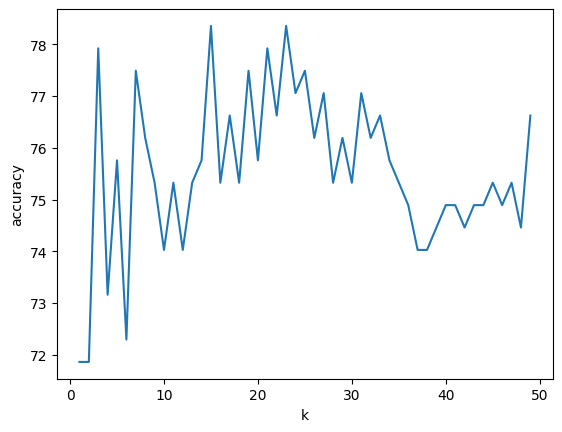

In [ ]:
plt.plot(x[1:50],y[1:50])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

Visualize the results

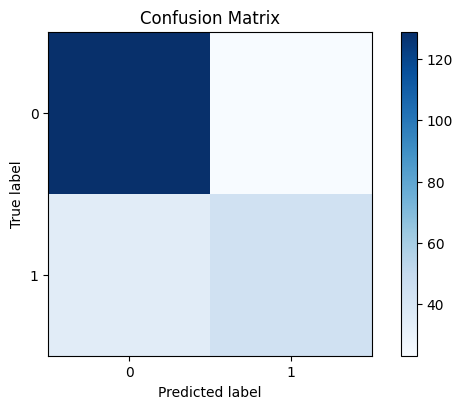

In [19]:
def confusion_matrix(y_test,y_pred):
    classes = np.unique(y_test)
    cm = np.zeros((len(classes),len(classes)),dtype = int)
    for a, p in zip(y_test, y_pred):
        cm[a][p] += 1
    return cm

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (6,4))
plt.imshow(cm, interpolation = 'nearest',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0','1'])
plt.yticks(tick_marks, ['0','1'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [ ]:
def classification_report(y_true,)